In [38]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import trompy as tp

from scipy import stats

import dill

rcParams['font.family'] = 'Arial'
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.transparent'] = True
colors = ["#67AFD2", "#016895", "#F4795B", "#C74632"]
custom_cmap = LinearSegmentedColormap.from_list("custom_diverging", [colors[1], "white", colors[3]])

savefigs = True

DATAFOLDER = Path("..//data")
RESULTSFOLDER = Path("..//results")
FIGSFOLDER = Path("C:/Users/jmc010/Dropbox/Publications in Progress/Bazzino Roitman_sodium/figs")

In [39]:
with open(DATAFOLDER / "bazzino_data.pickle", "rb") as f:
    data = dill.load(f)

x_array = data["x_array"]
snips_photo = data["snips_photo"]
snips_vel = data["snips_vel"]

In [40]:
savefigs

True

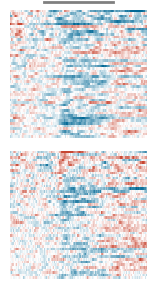

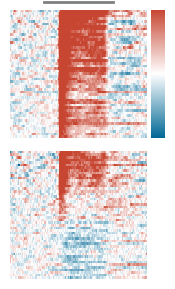

In [41]:
# savefigs = False

def get_heatmap_data(snips, x_array, condition, infusiontype):
    query_string = "condition == @condition & infusiontype == @infusiontype"

    heatmap_data = []
    df = x_array.query(query_string)
    for trial in df.trial.unique():
        tmp_snips = snips[df.query("trial == @trial").index]
        mean_snip = np.mean(tmp_snips, axis=0)
        heatmap_data.append(mean_snip)
        
    return np.array(heatmap_data)

def init_figure():
    f = plt.figure(figsize=(2, 3.5))
    gs = f.add_gridspec(2, 2, hspace=0.1, wspace=0.05, width_ratios=[10, 1])
    
    ax1 = f.add_subplot(gs[0, 0])
    ax2 = f.add_subplot(gs[1, 0])
    cbar_ax = f.add_subplot(gs[0, 1])
    
    return f, ax1, ax2, cbar_ax

def make_heatmap(data, ax, vlim, cbar_ax=None, inf_bar=False):
    
    if cbar_ax is not None:
        cbar=True
    else:
        cbar=False
        
    sns.heatmap(np.array(data),
                cmap=custom_cmap,
                ax=ax,
                cbar=cbar,
                cbar_ax=cbar_ax,
                vmin=-vlim, vmax=vlim
                )
    
    if cbar_ax is not None:
        cbar_ax.set_yticks([])
    
    if inf_bar:
        ax.plot([50,150], [-3, -3], color="black", lw=2, alpha=0.5, clip_on=False)
        
    ax.set_xticks([])
    ax.set_yticks([])

vlim = 1

# replete
f, ax1, ax2, cbar_ax = init_figure()

heatmap_data = get_heatmap_data(snips_photo, x_array, "replete", "10NaCl")
replete_10_inf = np.mean(heatmap_data[:,49:150], axis=1)
make_heatmap(heatmap_data, ax1, vlim, inf_bar=True)

heatmap_data = get_heatmap_data(snips_photo, x_array, "replete", "45NaCl")
replete_45_inf = np.mean(heatmap_data[:,49:150], axis=1)
make_heatmap(heatmap_data, ax2, vlim)

cbar_ax.remove()

if savefigs:
    f.savefig(FIGSFOLDER / "heatmap_replete.pdf")

# male, deplete
f, ax1, ax2, cbar_ax = init_figure()

heatmap_data = get_heatmap_data(snips_photo, x_array, "deplete", "10NaCl")
deplete_10_inf = np.mean(heatmap_data[:,49:150], axis=1)
make_heatmap(heatmap_data, ax1, vlim, inf_bar=True)

heatmap_data = get_heatmap_data(snips_photo, x_array, "deplete", "45NaCl")
deplete_45_inf = np.mean(heatmap_data[:,49:150], axis=1)
make_heatmap(heatmap_data, ax2, vlim, cbar_ax=cbar_ax)

if savefigs:
    f.savefig(FIGSFOLDER / "heatmap_deplete.pdf")

C:\Users\jmc010\AppData\Local\Temp\ipykernel_25996\3498224726.py:47: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc.append(np.trapz(snip[50:150]))
C:\Users\jmc010\AppData\Local\Temp\ipykernel_25996\3498224726.py:47: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc.append(np.trapz(snip[50:150]))


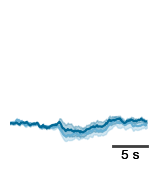

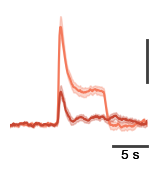

In [26]:
def get_mean_snips(snips, x_array, condition):

    query_string = "condition == @condition"

    snips_10, snips_45 = [], []
    for id in x_array.query(query_string + " & infusiontype == '10NaCl'").id.unique():
        snips_10.append(np.mean(snips[x_array.query(query_string + " & id == @id").index], axis=0))
    for id in x_array.query(query_string + " & infusiontype == '45NaCl'").id.unique():
        snips_45.append(np.mean(snips[x_array.query(query_string + " & id == @id").index], axis=0))
        
    return np.array(snips_10), np.array(snips_45)

def init_figure():
    f = plt.figure(figsize=(2, 2))
    gs = f.add_gridspec(1, 2, hspace=0.1, wspace=0.05, width_ratios=[10, 1], bottom=0.2)
    ax = f.add_subplot(gs[0, 0])
    
    return f, ax
    
def plot_snips(snips_10, snips_45, ax, colors_10, colors_45, ylims, scalebar=False):
    for snips, col in zip([snips_10, snips_45], [colors_10, colors_45]):
        x = np.arange(snips.shape[1]) / 10
        mean = np.mean(snips, axis=0)
        sd = np.std(snips, axis=0)
        sem = sd / np.sqrt(snips.shape[0])
        
        ax.plot(x, mean, color=col, lw=1.5)
        ax.fill_between(x, mean-sem, mean+sem, alpha=0.3, color=col)
        
        sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)
        ax.set_xticks([])
        ax.set_yticks([])
        
        ax.set_xlim([0, 20])
        ax.set_ylim(ylims)
        ax.plot([15,20], [ylims[0], ylims[0]], color="black", lw=2, alpha=0.5, clip_on=False)
        ax.text(17.5, ylims[0]-0.1, "5 s", ha="center", va="top", fontsize=10)
        
        if scalebar:
            ax.plot([20, 20], [1, 2], color="black", lw=2, alpha=0.5, clip_on=False)
    
    
    
def get_auc(snips):
    auc = []
    for snip in snips:
        auc.append(np.trapz(snip[50:150]))
    return np.array(auc)

ylims = [-0.5, 2.7]

# replete
f, ax = init_figure()

snips_10, snips_45 = get_mean_snips(snips_photo, x_array, "replete")
plot_snips(snips_10, snips_45, ax, colors[0], colors[1], ylims)
replete_aucs = [get_auc(snips_10), get_auc(snips_45)]

if savefigs:
    f.savefig(FIGSFOLDER / "snips_replete.pdf")

# deplete
f, ax = init_figure()

snips_10, snips_45 = get_mean_snips(snips_photo, x_array, "deplete")
plot_snips(snips_10, snips_45, ax, colors[2], colors[3], ylims, scalebar=True)
deplete_aucs = [get_auc(snips_10), get_auc(snips_45)]

if savefigs:
    f.savefig(FIGSFOLDER / "snips_deplete.pdf")
    




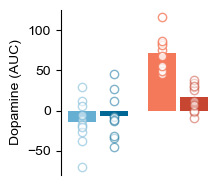

In [27]:
f, ax = plt.subplots(figsize=(2.2, 2.2),
                     gridspec_kw={"left": 0.25, "right": 0.95, "top": 0.95, "bottom": 0.2})


aucs = [replete_aucs, deplete_aucs]
barx = [1, 2]
barwidth=0.35

spacer = 0.2
ax.bar(barx[0] - spacer, np.mean(aucs[0][0]), color=colors[0], width=barwidth)
ax.bar(barx[0] + spacer, np.mean(aucs[0][1]), color=colors[1], width=barwidth)

ax.bar(barx[1] - spacer, np.mean(aucs[1][0]), color=colors[2], width=barwidth)
ax.bar(barx[1] + spacer, np.mean(aucs[1][1]), color=colors[3], width=barwidth)

ax.scatter([barx[0] - spacer]*len(aucs[0][0]), aucs[0][0], facecolors="white", edgecolors=colors[0], alpha=0.5)
ax.scatter([barx[0] + spacer]*len(aucs[0][1]), aucs[0][1], facecolors="white", edgecolors=colors[1], alpha=0.5)
ax.scatter([barx[1] - spacer]*len(aucs[1][0]), aucs[1][0], facecolors="white", edgecolors=colors[2], alpha=0.8)
ax.scatter([barx[1] + spacer]*len(aucs[1][1]), aucs[1][1], facecolors="white", edgecolors=colors[3], alpha=0.5)

sns.despine(ax=ax, top=True, right=True, left=False, bottom=True)
ax.set_xticks([])
ax.set_yticks([-50, 0, 50, 100])
ax.set_ylim([-80,125])

ax.set_ylabel("Dopamine (AUC)", fontsize=10)

if savefigs:
    f.savefig(FIGSFOLDER / "aucs.pdf")


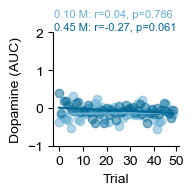

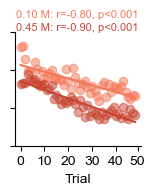

In [ ]:
# savefigs = True
from scipy.optimize import curve_fit

def draw_regression_line(y, ax, color):
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    y_fit = slope * x + intercept
    ax.plot(x, y_fit, color=color, lw=1.5)
    
    return r_value, p_value

def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

def make_correlation_plot(inf10, inf45, col10, col45, yaxis=False):
    
    f, ax = plt.subplots(figsize=(1.8,1.8),
                         gridspec_kw={"left": 0.25, "right": 0.95, "top": 0.85, "bottom": 0.22})

    ax.scatter(np.arange(len(inf10)), inf10, color=col10, alpha=0.5)
    ax.scatter(np.arange(len(inf45)), inf45, color=col45, alpha=0.5)

    r, p = draw_regression_line(inf10, ax, col10)
    if p < 0.001:
        p = "p<0.001"
    else:
        p = f"p={p:.3f}"
    ax.text(-2, 2.35, f"0.10 M: r={r:.2f}, {p}", color=col10, fontsize=8,
            va="bottom", ha="left")
    r, p = draw_regression_line(inf45, ax, col45)
    if p < 0.001:
        p = "p<0.001"
    else:
        p = f"p={p:.3f}"
    ax.text(-2, 2, f"0.45 M: r={r:.2f}, {p}", color=col45, fontsize=8,
            va="bottom", ha="left")

    sns.despine(ax=ax)

    ax.set_ylim([-1, 2])
    
    if yaxis:
        ax.set_yticks([-1, 0, 1, 2])
        ax.set_ylabel("Dopamine (AUC)")
    else:
        ax.set_yticks([-1, 0, 1, 2], labels=["", "", "", ""])
    
    
    ax.set_xticks([0, 10, 20, 30, 40, 49], labels=["0", "10", "20", "30", "40", "50"])
    ax.set_xlabel("Trial")
    
    return f
    
f = make_correlation_plot(replete_10_inf, replete_45_inf, colors[0], colors[1], yaxis=True)
if savefigs:
    f.savefig(FIGSFOLDER / "correlation_replete.pdf")
    
f = make_correlation_plot(deplete_10_inf, deplete_45_inf, colors[2], colors[3])
if savefigs:
    f.savefig(FIGSFOLDER / "correlation_deplete.pdf")
    



0.06156262525212475
0.24195265673930233
0.7094978835632022
0.8678675098145691


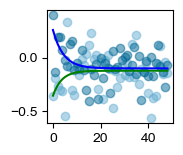

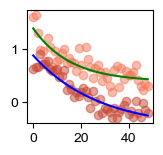

In [45]:
# savefigs = True
from scipy.optimize import curve_fit

def draw_regression_line(y, ax, color):
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    y_fit = slope * x + intercept
    ax.plot(x, y_fit, color=color, lw=1.5)
    
    return r_value, p_value

def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

def get_rvalue(x, y, popt):
    # After fitting:
    y_fit = exp_decay(x, *popt)

    # Calculate R^2
    ss_res = np.sum((y - y_fit) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)

    return r_squared

def make_correlation_plot(inf10, inf45, col10, col45, yaxis=False):
    
    f, ax = plt.subplots(figsize=(1.8,1.8),
                         gridspec_kw={"left": 0.25, "right": 0.95, "top": 0.85, "bottom": 0.22})

    x = np.arange(len(inf10))
                  
    ax.scatter(x, inf10, color=col10, alpha=0.5)
    ax.scatter(x, inf45, color=col45, alpha=0.5)

    popt, pcov = curve_fit(exp_decay, x, inf10, p0=(1, 0.1, 0))  # p0 are initial guesses
    ax.plot(x, exp_decay(x, *popt), color="green", lw=1.5)
    print(get_rvalue(x, inf10, popt))
    popt, pcov = curve_fit(exp_decay, x, inf45, p0=(1, 0.1, 0))  # p0 are initial guesses
    ax.plot(x, exp_decay(x, *popt), color="blue", lw=1.5)
    print(get_rvalue(x, inf45, popt))




    # r, p = draw_regression_line(inf10, ax, col10)
    # if p < 0.001:
    #     p = "p<0.001"
    # else:
    #     p = f"p={p:.3f}"
    # ax.text(-2, 2.35, f"0.10 M: r={r:.2f}, {p}", color=col10, fontsize=8,
    #         va="bottom", ha="left")
    # r, p = draw_regression_line(inf45, ax, col45)
    # if p < 0.001:
    #     p = "p<0.001"
    # else:
    #     p = f"p={p:.3f}"
    # ax.text(-2, 2, f"0.45 M: r={r:.2f}, {p}", color=col45, fontsize=8,
    #         va="bottom", ha="left")

    # sns.despine(ax=ax)

    # ax.set_ylim([-1, 2])
    
    # if yaxis:
    #     ax.set_yticks([-1, 0, 1, 2])
    #     ax.set_ylabel("Dopamine (AUC)")
    # else:
    #     ax.set_yticks([-1, 0, 1, 2], labels=["", "", "", ""])
    
    
    # ax.set_xticks([0, 10, 20, 30, 40, 49], labels=["0", "10", "20", "30", "40", "50"])
    # ax.set_xlabel("Trial")
    
    return f
    
f = make_correlation_plot(replete_10_inf, replete_45_inf, colors[0], colors[1], yaxis=True)
if savefigs:
    f.savefig(FIGSFOLDER / "correlation_expdecay_replete.pdf")
    
f = make_correlation_plot(deplete_10_inf, deplete_45_inf, colors[2], colors[3])
if savefigs:
    f.savefig(FIGSFOLDER / "correlation_expdecay_deplete.pdf")
    



In [27]:
snips_all.shape

(1967, 200)